In [ ]:
!pip install researchpy
!pip install pyreadstat
!pip install pingouin
!git clone https://github.com/Rasstin/Experimental_Methods.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'Experimental_Methods' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp
import numpy as np
import statsmodels as sm
import statsmodels.stats.multicomp as mc
from statsmodels.formula.api import ols
import pingouin as pg

# Reading & Data Cleaning & EDA

In [ ]:
df = pd.read_spss('Experimental_Methods/IAT Data agregated and transposed.sav')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Subject      48 non-null     float64 
 1   age          48 non-null     float64 
 2   sex          48 non-null     category
 3   order        48 non-null     category
 4   LnRT_mean.1  48 non-null     float64 
 5   LnRT_mean.2  48 non-null     float64 
dtypes: category(2), float64(4)
memory usage: 2.0 KB


In [ ]:
df.Subject = df.Subject.astype(int)
df.age = df.age.astype(int)

In [ ]:
df.shape

(48, 6)

In [ ]:
df.head()

,Subject,age,sex,order,LnRT_mean.1,LnRT_mean.2
0,7,20,female,Cokepos - Cokeneg,6.445682,6.596685
1,8,19,female,Cokepos - Cokeneg,6.316605,6.480283
2,11,19,female,Cokepos - Cokeneg,6.589273,6.575128
3,13,19,female,Cokepos - Cokeneg,6.703936,6.645945
4,14,20,female,Cokepos - Cokeneg,6.424400,6.388737


In [ ]:
# df.Subject.value_counts()

In [ ]:
df.head()

,Subject,age,sex,order,LnRT_mean.1,LnRT_mean.2
0,7,20,female,Cokepos - Cokeneg,6.445682,6.596685
1,8,19,female,Cokepos - Cokeneg,6.316605,6.480283
2,11,19,female,Cokepos - Cokeneg,6.589273,6.575128
3,13,19,female,Cokepos - Cokeneg,6.703936,6.645945
4,14,20,female,Cokepos - Cokeneg,6.424400,6.388737


In [ ]:
df.shape

(48, 6)

In [ ]:
df.nunique()

Subject        48
age            12
sex             2
order           2
LnRT_mean.1    48
LnRT_mean.2    48
dtype: int64

In [ ]:
df.order.unique()

['Cokepos - Cokeneg', 'Cokeneg - Cokepos']
Categories (2, object): ['Cokeneg - Cokepos', 'Cokepos - Cokeneg']

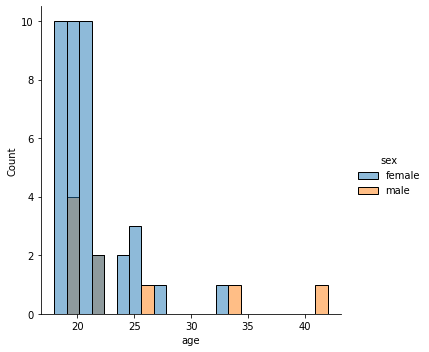

In [ ]:
sns.displot(data = df , x ='age',hue='sex',)

In [ ]:
df.age.mean() , df.age.std(), df.sex.value_counts(normalize=True)

(21.916666666666668, 4.384854656041626, female    0.8125
 male      0.1875
 Name: sex, dtype: float64)

In [ ]:
df.head()

,Subject,age,sex,order,LnRT_mean.1,LnRT_mean.2
0,7,20,female,Cokepos - Cokeneg,6.445682,6.596685
1,8,19,female,Cokepos - Cokeneg,6.316605,6.480283
2,11,19,female,Cokepos - Cokeneg,6.589273,6.575128
3,13,19,female,Cokepos - Cokeneg,6.703936,6.645945
4,14,20,female,Cokepos - Cokeneg,6.424400,6.388737


In [ ]:
df2 = df.copy()

In [ ]:
tmp = df

In [ ]:
tmp.rename(columns={"LnRT_mean.1":"round_1","LnRT_mean.2":"round_2","order":'Order'},inplace=True)

In [ ]:
tmp.head()

,Subject,age,sex,Order,round_1,round_2
0,7,20,female,Cokepos - Cokeneg,6.445682,6.596685
1,8,19,female,Cokepos - Cokeneg,6.316605,6.480283
2,11,19,female,Cokepos - Cokeneg,6.589273,6.575128
3,13,19,female,Cokepos - Cokeneg,6.703936,6.645945
4,14,20,female,Cokepos - Cokeneg,6.424400,6.388737


In [ ]:
tmp = tmp.melt(value_vars=['round_1','round_2'] , var_name= 'Round' ,value_name='LnRT_mean' ,id_vars = ['Order' , 'Subject'])

In [ ]:
tmp.head()

,Order,Subject,Round,LnRT_mean
0,Cokepos - Cokeneg,7,round_1,6.445682
1,Cokepos - Cokeneg,8,round_1,6.316605
2,Cokepos - Cokeneg,11,round_1,6.589273
3,Cokepos - Cokeneg,13,round_1,6.703936
4,Cokepos - Cokeneg,14,round_1,6.424400


In [ ]:
tmp['Block'] = tmp.apply(lambda x: ( x.Order.split('-')[ int( x.Round.split('_')[1] ) - 1 ] ).strip() , axis = 1)

In [ ]:
x = ["Order" , 'Block']
wx = 'Block'
bx = 'Order'
# gx = 'Block'

y = "LnRT_mean"


In [ ]:

df = tmp 

In [ ]:
report = rp.summary_cont(df.groupby(x[0]),decimals=3)[y]


report['95% Conf.Interval'] = report.apply(lambda x : [x['95% Conf.'] , x['Interval']], axis =1 )

report = report.drop(columns=['95% Conf.' , 'Interval'])

report.style.background_gradient(subset= report.columns[1:-1] ,vmin = 0).set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,N,Mean,SD,SE,95% Conf.Interval
Order,,,,,
Cokeneg - Cokepos,46,6.511,0.148,0.022,"[6.467, 6.555]"
Cokepos - Cokeneg,50,6.475,0.152,0.022,"[6.432, 6.518]"


In [ ]:
report = rp.summary_cont(df.groupby(x[1]),decimals=3)[y]

report

report['95% Conf.Interval'] = report.apply(lambda x : [x['95% Conf.'] , x['Interval']], axis =1 )

report = report.drop(columns=['95% Conf.' , 'Interval'])

report.style.background_gradient(subset= report.columns[1:-1] ,vmin = 0).set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  if __name__ == '__main__':


,N,Mean,SD,SE,95% Conf.Interval
Block,,,,,
Cokeneg,48,6.537,0.166,0.024,"[6.488, 6.585]"
Cokepos,48,6.448,0.119,0.017,"[6.413, 6.482]"


In [ ]:
report = rp.summary_cont(df.groupby(x),decimals=3)[y]

# report

report['95% Conf.Interval'] = report.apply(lambda x : [x['95% Conf.'] , x['Interval']], axis =1 )

report = report.drop(columns=['95% Conf.' , 'Interval'])

report.style.background_gradient(subset= report.columns[1:-1] ,vmin = 0).set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  if __name__ == '__main__':


In [ ]:
stats.describe(df[y])

DescribeResult(nobs=96, minmax=(6.144592027085273, 6.927681718287509), mean=6.492230137608796, variance=0.022719741737498113, skewness=0.5698214071220099, kurtosis=0.5236192434321136)

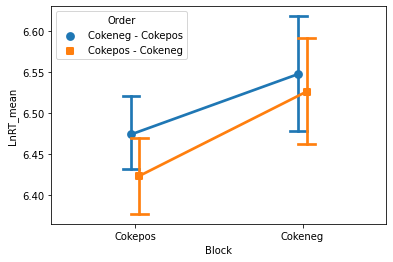

In [ ]:
sns.pointplot(data=df, x= wx , y= y , hue=bx , dodge=True, markers=['o', 's'],
              capsize=.1, )

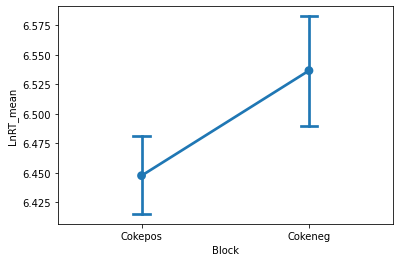

In [ ]:
sns.pointplot(data=df, x= wx , y= y  , dodge=True, markers=['o', 's'],
              capsize=.1, )

# Question 1

### Normality Assumption

In [ ]:
df['residuals'] = df[y] -  df.groupby(x)[y].transform('mean')

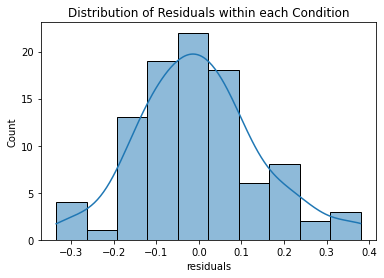

In [ ]:
sns.histplot(data =df, x = 'residuals' ,kde = True
#              ,  binwidth=1  ,binrange=[-7.5,8.5]
            )
# plt.xticks(range(-7,8,1))
# plt.yticks(range(0,21,2))
plt.title('Distribution of Residuals within each Condition')
plt.show()

In [ ]:
# a = 10
# r = [x/a for x in range(6*a,7*a)]
# plt.figure(figsize=(20,20))
# g = sns.FacetGrid(df, col = x[0],row=x[1],height=4)
# g.map(sns.histplot, y,kde = True
# #       ,binwidth=1,binrange=(1,10)
#      )

# plt.xticks(r)
# plt.show()

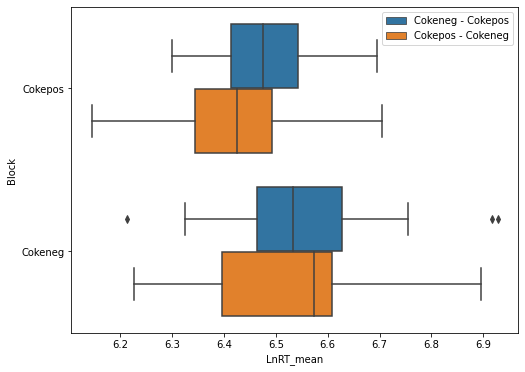

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df, x = y , y = x[1], hue=x[0])
# plt.xticks(range(0,10,1))
plt.legend(loc=1)
plt.show()

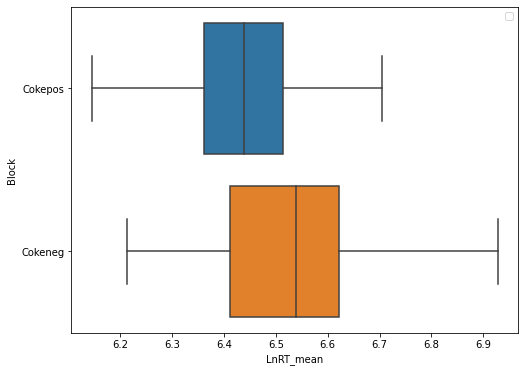

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df, x = y , y = x[1],)
# plt.xticks(range(0,10,1))
plt.legend(loc=1)
plt.show()

Text(0.5, 1.0, 'Q-Q Plot of Residuals within each Condition')

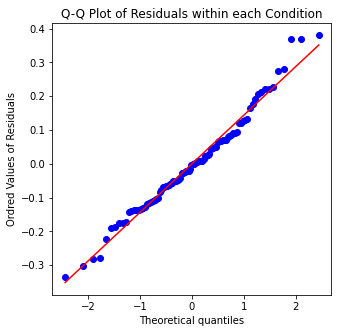

In [ ]:

fig, (ax) = plt.subplots(figsize = (5,5))
res = stats.probplot(df['residuals'],dist='norm', plot=ax)
plt.ylabel('Ordred Values of Residuals')
plt.title('Q-Q Plot of Residuals within each Condition')

In [ ]:
# def qqplot_new(x, ax=None, **kwargs):
#     if ax is None:
#         ax = plt.gca()
# #     sm.qqplot(x, ax=ax, **kwargs)
#     stats.probplot(x, plot=ax)
# #     plt.yticks(range(0,11))
# #     plt.ylim((0,10))
    

# g = sns.FacetGrid(df, col=x[0], row = x[1],height= 4)
# # g.map(qqplot_new, "prob", line='s')
# g.map(qqplot_new, y,dist='norm')
# # g.set_xlabel('axes label 1')
# # g.axes[0,0].set_xlabel('axes label 1')



In [ ]:
tmp = df.groupby(x)[y].apply(stats.describe)
tmp.iloc[0] , tmp.iloc[1] , tmp.iloc[2] , tmp.iloc[3] 

(DescribeResult(nobs=23, minmax=(6.212809320251558, 6.927681718287509), mean=6.547908734057586, variance=0.029248266341337124, skewness=0.5605368268563116, kurtosis=0.3311823893235437),
 DescribeResult(nobs=23, minmax=(6.298970004105033, 6.694333154832526), mean=6.474084824919088, variance=0.012960975805217378, skewness=0.35636823080481417, kurtosis=-0.6035115135934204),
 DescribeResult(nobs=25, minmax=(6.225196415650527, 6.895455294943365), mean=6.526478805274589, variance=0.02722262705559458, skewness=0.17222095998888773, kurtosis=-0.3079212846023003),
 DescribeResult(nobs=25, minmax=(6.144592027085273, 6.703935886113082), mean=6.423450848884647, variance=0.014581866613298779, skewness=0.26570122256101575, kurtosis=0.39354095620414054))

In [ ]:
statistics = df.groupby(x)[y].apply(stats.describe).apply(pd.Series)
statistics.columns = ['nobs' , 'minmax','mean','variance','skewness','kurtosis']
statistics

statistics.reset_index(inplace=True)

s_all = pd.DataFrame(stats.describe(df[y]),index=['nobs' , 'minmax','mean','variance','skewness','kurtosis']).transpose()

s_all[['Order','Block']] = ['all','all']

s_all

statistics = s_all.append(statistics,ignore_index=True)

statistics = pd.concat([statistics.minmax.apply(pd.Series).rename(columns={0:'min',1:'max'})
                        ,statistics]
                       ,axis=1)

statistics = statistics[['Order','Block','nobs' , 'min','max','mean','variance','skewness','kurtosis']]

statistics = statistics.set_index(['Order','Block'])

statistics.style.background_gradient(subset = statistics.columns[1:-3],vmin=6, vmax = 7)\
.background_gradient(subset = statistics.columns[-3:-2],vmin=0.01, vmax = 0.03 ,cmap='YlOrRd')\
.bar(subset = statistics.columns[-2:], align = "mid", color = ["salmon", "lightgreen"],vmin=-0.7,vmax=0.7).set_precision(3).\
set_properties(**{'text-align': 'center'}).\
set_table_styles(
[dict(selector = 'th', props=[('text-align', 'center')])])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


In [ ]:
stats.normaltest(df.residuals)

NormaltestResult(statistic=3.3929376545146486, pvalue=0.18332975143216582)

In [ ]:
df.groupby(x)[y].apply(stats.normaltest)

Order              Block  
Cokeneg - Cokepos  Cokeneg     (2.5487930878710428, 0.2795996434227015)
                   Cokepos     (0.8180559108728412, 0.6642956613875124)
Cokepos - Cokeneg  Cokeneg    (0.18901120620891834, 0.9098226367804749)
                   Cokepos    (1.4225617051167303, 0.49101487685233536)
Name: LnRT_mean, dtype: object

In [ ]:
stats.shapiro(df.residuals,)

ShapiroResult(statistic=0.9810486435890198, pvalue=0.17993025481700897)

In [ ]:
df.groupby(x)[y].apply(stats.shapiro)

Order              Block  
Cokeneg - Cokepos  Cokeneg     (0.9510126709938049, 0.3070937395095825)
                   Cokepos    (0.9583685994148254, 0.43122878670692444)
Cokepos - Cokeneg  Cokeneg      (0.9772460460662842, 0.825670599937439)
                   Cokepos     (0.9693151116371155, 0.6277503967285156)
Name: LnRT_mean, dtype: object

In [ ]:
df['z_score'] = df.groupby(x)[y].transform(stats.zscore , ddof=1)

Text(0.5, 0.98, 'Z-score within each Condition')

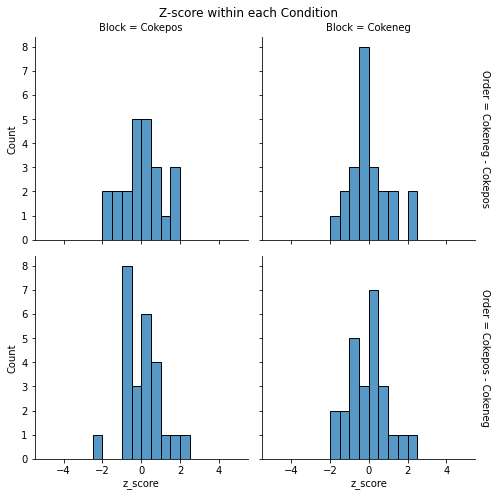

In [ ]:

g = sns.FacetGrid(df, col=wx, row = bx,height=3.5,margin_titles=True)

g.map(sns.histplot, 'z_score',binwidth = 0.5, binrange = ( -5 ,5 ))
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Z-score within each Condition')




In [ ]:
df['outlier'] = df.z_score.abs()> 3

In [ ]:
def color_boolean(val):
    color =''
    if val == True:
        color = 'red'
    elif val == False:
        color = 'green'
    return 'background-color: %s' % color

In [ ]:
df.style.applymap(color_boolean, subset=['outlier']).\
bar(subset = ["z_score"], align = "mid", color = ["salmon", "lightgreen"])


,Order,Subject,Round,LnRT_mean,Block,residuals,z_score,outlier
0,Cokepos - Cokeneg,7,round_1,6.445682,Cokepos,0.022231,0.184098,False
1,Cokepos - Cokeneg,8,round_1,6.316605,Cokepos,-0.106846,-0.884810,False
2,Cokepos - Cokeneg,11,round_1,6.589273,Cokepos,0.165823,1.373211,False
3,Cokepos - Cokeneg,13,round_1,6.703936,Cokepos,0.280485,2.322754,False
4,Cokepos - Cokeneg,14,round_1,6.424400,Cokepos,0.000949,0.007863,False
5,Cokepos - Cokeneg,16,round_1,6.344710,Cokepos,-0.078741,-0.652066,False
6,Cokepos - Cokeneg,17,round_1,6.144592,Cokepos,-0.278859,-2.309287,False
7,Cokeneg - Cokepos,20,round_1,6.547183,Cokeneg,-0.000726,-0.004244,False
8,Cokeneg - Cokepos,23,round_1,6.553470,Cokeneg,0.005561,0.032516,False
9,Cokeneg - Cokepos,25,round_1,6.738198,Cokeneg,0.190289,1.112666,False


# Question 3

###  Levene's test for homogeneity of variances

In [ ]:
groups = df.groupby(bx)[y].apply(lambda t : t.to_list())

In [ ]:
groups

Order
Cokeneg - Cokepos    [6.54718295200632, 6.553469664873089, 6.738198...
Cokepos - Cokeneg    [6.4456816613879955, 6.316605289575691, 6.5892...
Name: LnRT_mean, dtype: object

In [ ]:
stats.levene(*groups,center = 'mean')

LeveneResult(statistic=0.3431564010190027, pvalue=0.5594167973892104)

###  Mauchly sphericity test 


In [ ]:
pg.sphericity(df, dv = y ,within = wx,subject = 'Subject')

(True, nan, nan, 1, 1.0)

In [ ]:
df.groupby(wx)[y].var()

Block
Cokeneg    0.027709
Cokepos    0.014166
Name: LnRT_mean, dtype: float64

###  Box’s M for homogeneity of covariances


In [ ]:
print(pg.box_m(df, dvs = [y] ,group= bx))

         Chi2   df      pval  equal_cov
box  0.030285  1.0  0.861845       True


### mixed Anova

In [ ]:
mixed = pg.mixed_anova(df, dv = y, between = bx,within = wx,subject = 'Subject').fillna("")
mixed.style.highlight_between(subset='p-unc',color='orange', left= 0 , right= 0.05)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Order,0.031105,1,46,0.031105,0.934532,0.338743,0.019911,
1,Block,0.190251,1,46,0.190251,21.833102,0.000026,0.321865,1.000000
2,Interaction,0.005108,1,46,0.005108,0.586235,0.447790,0.012584,


In [ ]:
pairwise_ttests = pg.pairwise_ttests(dv=y, within=wx, between=bx,
                              subject='Subject', data=df)

pairwise_ttests.style.highlight_max(subset=['Paired'],color='cornflowerblue').\
highlight_max(subset=['Parametric'],color='skyblue').\
highlight_between(subset='p-unc',color='orange', left= 0 , right= 0.05)


/usr/local/lib/python3.7/dist-packages/pingouin/pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,Block,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Block,-,Cokeneg,Cokepos,True,True,4.693295,47.000000,two-sided,0.000024,875.941,0.610389
1,Order,-,Cokepos - Cokeneg,Cokeneg - Cokepos,False,True,-0.964913,45.248763,two-sided,0.339717,0.42,-0.274729
2,Block * Order,Cokeneg,Cokepos - Cokeneg,Cokeneg - Cokepos,False,True,-0.441075,45.336079,two-sided,0.661255,0.311,-0.125540
3,Block * Order,Cokepos,Cokepos - Cokeneg,Cokeneg - Cokepos,False,True,-1.495199,45.968258,two-sided,0.141696,0.709,-0.423857


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Block,Cokeneg,Cokepos,True,True,4.693295,47.000000,two-sided,0.000024,875.941,0.610389


usage: jupyter-nbconvert [-h] [--debug] [--show-config] [--show-config-json]
                         [--generate-config] [-y] [--execute] [--allow-errors]
                         [--stdin] [--stdout] [--inplace] [--clear-output]
                         [--no-prompt] [--no-input]
                         [--log-level NbConvertApp.log_level]
                         [--config NbConvertApp.config_file]
                         [--to NbConvertApp.export_format]
                         [--template TemplateExporter.template_file]
                         [--writer NbConvertApp.writer_class]
                         [--post NbConvertApp.postprocessor_class]
                         [--output NbConvertApp.output_base]
                         [--output-dir FilesWriter.build_directory]
                         [--reveal-prefix SlidesExporter.reveal_url_prefix]
                         [--nbformat NotebookExporter.nbformat_version]
                         [extra_args [extra_args ...]]
jupyt